### Importación de datos



In [26]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt


# URLs de los datos
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Mostrar las primeras filas de la primera tienda para verificar
print("Primeras filas de la Tienda 1:")
tienda.head()

ModuleNotFoundError: No module named 'seaborn'

#1. Análisis de facturación



In [12]:
# Configuración de estilo para las gráficas
plt.style.use('default')

# Agregar columna de tienda a cada DataFrame
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Combinar todos los DataFrames
tiendas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Convertir la columna de fecha a datetime
tiendas_combinadas['Fecha de Compra'] = pd.to_datetime(tiendas_combinadas['Fecha de Compra'], format='%d/%m/%Y')

# Mostrar información básica
print("Información del dataset combinado:")
print(f"Número total de registros: {len(tiendas_combinadas)}")
print("\nResumen estadístico de precios:")
print(tiendas_combinadas['Precio'].describe())

Información del dataset combinado:
Número total de registros: 9435

Resumen estadístico de precios:
count    9.435000e+03
mean     4.667323e+05
std      5.903207e+05
min      7.600000e+03
25%      5.520000e+04
50%      2.215000e+05
75%      6.633000e+05
max      2.977000e+06
Name: Precio, dtype: float64


Cantidad de productos vendidos por categoría en cada tienda:
Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
Tienda                                                                  
Tienda 1                                    171                   284   
Tienda 2                                    181                   275   
Tienda 3                                    177                   277   
Tienda 4                                    201                   277   

Categoría del Producto  Electrodomésticos  Electrónicos  \
Tienda                                                    
Tienda 1                              312           448   
Tienda 2                              305           422   
Tienda 3                              278           451   
Tienda 4                              254           451   

Categoría del Producto  Instrumentos musicales  Juguetes  Libros  Muebles  
Tienda                                                               

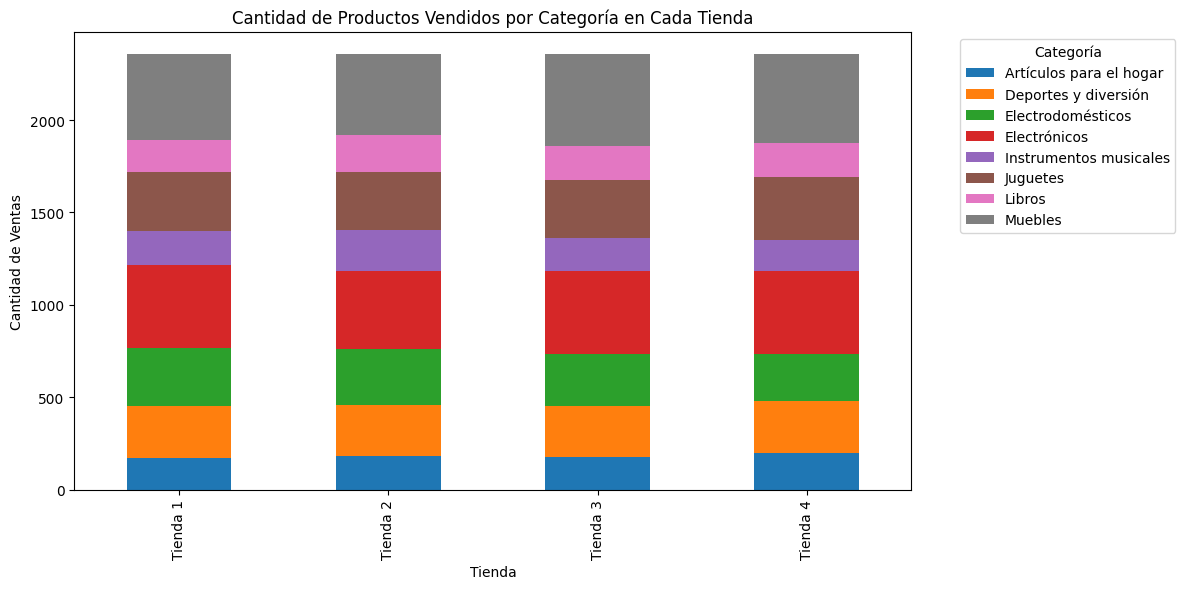

In [18]:
# Cantidad de productos vendidos por categoría en cada tienda
ventas_categoria_tienda = tiendas_combinadas.groupby(['Tienda', 'Categoría del Producto'])['Producto'].count().unstack().fillna(0)

# Mostrar la tabla
print("Cantidad de productos vendidos por categoría en cada tienda:")
print(ventas_categoria_tienda)

# Gráfico de barras apiladas
ventas_categoria_tienda.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cantidad de Productos Vendidos por Categoría en Cada Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Ventas')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

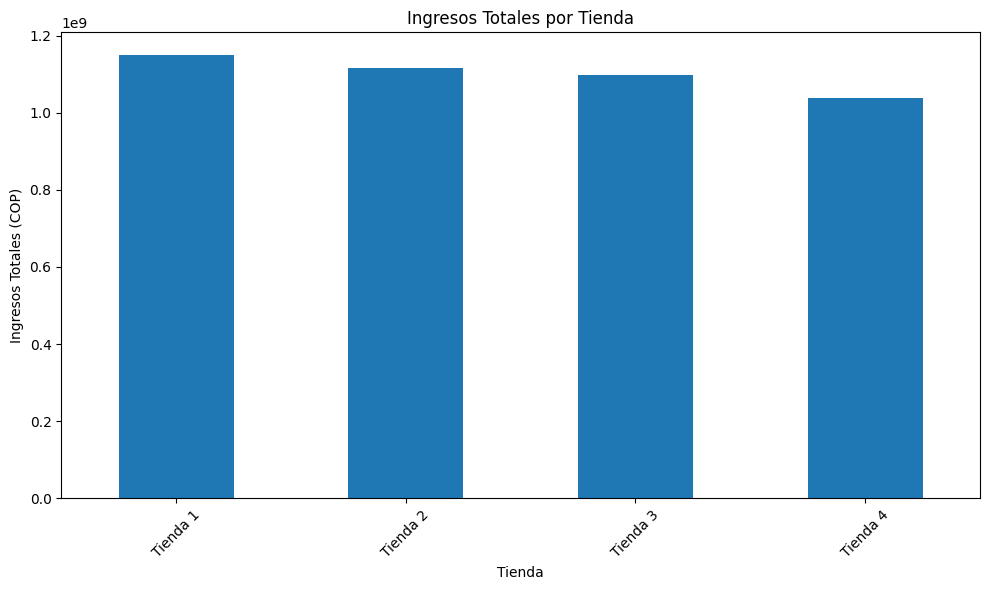


Ingresos totales por tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64

Ingreso promedio por venta:
Tienda
Tienda 1    487867.910131
Tienda 2    473227.426876
Tienda 3    465459.771089
Tienda 4    440362.892282
Name: Precio, dtype: float64


In [13]:
# Calcular ingresos totales por tienda
ingresos_por_tienda = tiendas_combinadas.groupby('Tienda')['Precio'].sum().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
ingresos_por_tienda.plot(kind='bar')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales (COP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar estadísticas
print("\nIngresos totales por tienda:")
print(ingresos_por_tienda)
print("\nIngreso promedio por venta:")
print(tiendas_combinadas.groupby('Tienda')['Precio'].mean())

# 2. Ventas por categoría

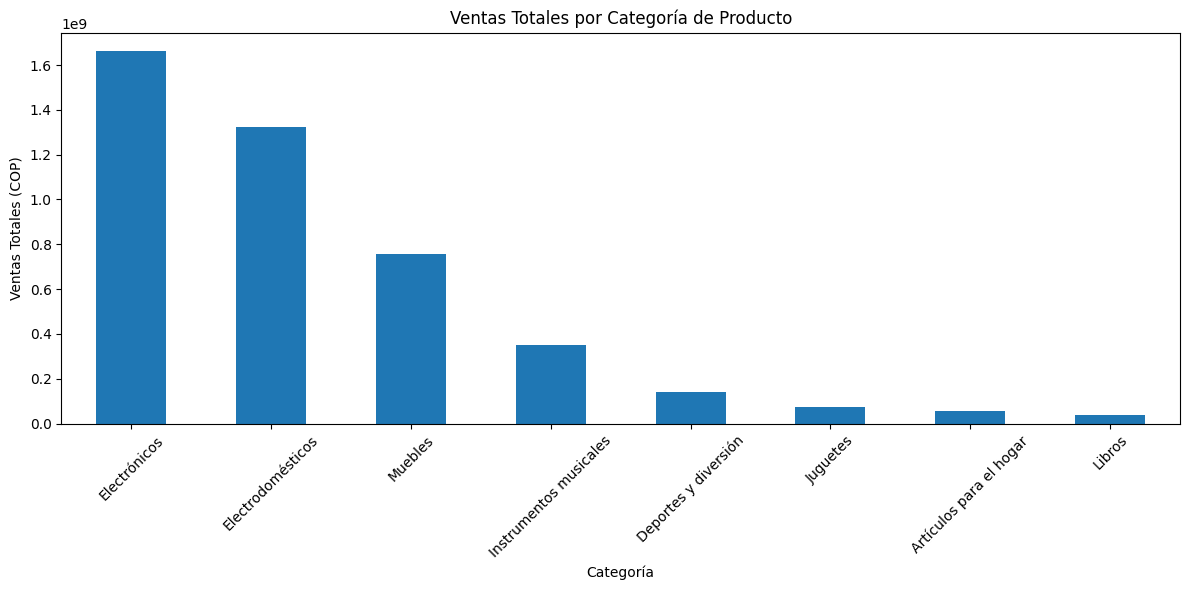


Ventas totales por categoría:
Categoría del Producto
Electrónicos               1.660576e+09
Electrodomésticos          1.324751e+09
Muebles                    7.576610e+08
Instrumentos musicales     3.487726e+08
Deportes y diversión       1.429777e+08
Juguetes                   7.360440e+07
Artículos para el hogar    5.757980e+07
Libros                     3.769610e+07
Name: Precio, dtype: float64

Ventas promedio por categoría:
Categoría del Producto
Artículos para el hogar    7.887644e+04
Deportes y diversión       1.284615e+05
Electrodomésticos          1.152960e+06
Electrónicos               9.371199e+05
Instrumentos musicales     4.631774e+05
Juguetes                   5.705767e+04
Libros                     5.080337e+04
Muebles                    4.017291e+05
Name: Precio, dtype: float64


In [20]:
# Análisis de ventas por categoría
ventas_por_categoria = tiendas_combinadas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

# Crear gráfico de barras para ventas por categoría
plt.figure(figsize=(12, 6))
ventas_por_categoria.plot(kind='bar')
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales (COP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar estadísticas
print("\nVentas totales por categoría:")
print(ventas_por_categoria)
print("\nVentas promedio por categoría:")
print(tiendas_combinadas.groupby('Categoría del Producto')['Precio'].mean())


Tienda: Tienda 1
Top 3 productos más vendidos:
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64
Top 3 productos menos vendidos:
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64


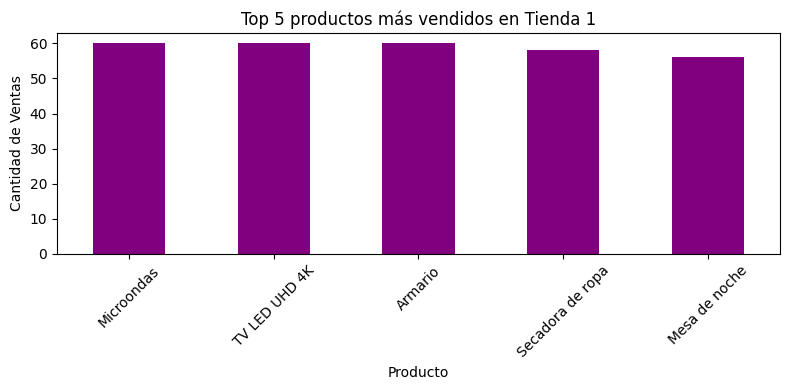


Tienda: Tienda 2
Top 3 productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64
Top 3 productos menos vendidos:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


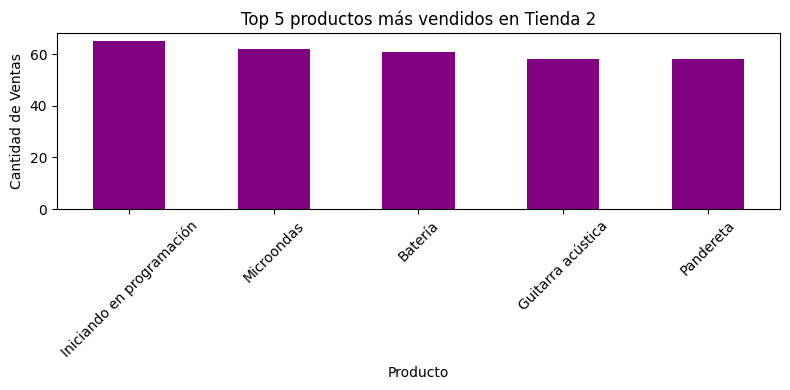


Tienda: Tienda 3
Top 3 productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64
Top 3 productos menos vendidos:
Producto
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


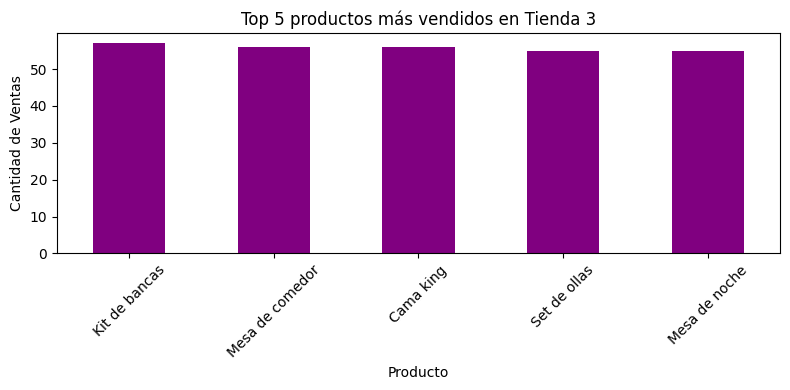


Tienda: Tienda 4
Top 3 productos más vendidos:
Producto
Cama box                   62
Cubertería                 59
Dashboards con Power BI    56
Name: count, dtype: int64
Top 3 productos menos vendidos:
Producto
Guitarra acústica     37
Armario               34
Guitarra eléctrica    33
Name: count, dtype: int64


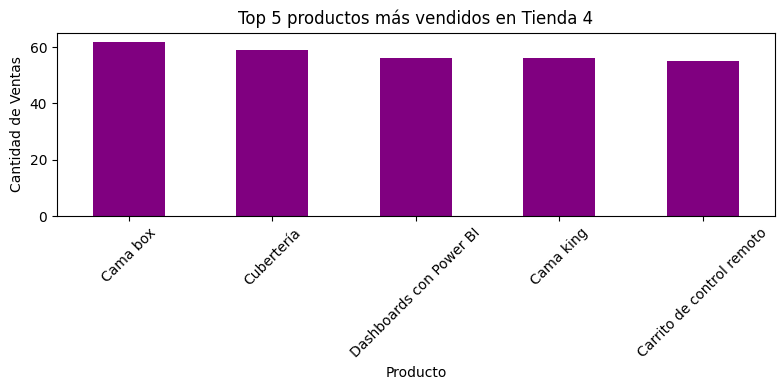

In [23]:
# Para cada tienda, mostrar los 3 productos más y menos vendidos
for tienda in tiendas_combinadas['Tienda'].unique():
    print(f"\nTienda: {tienda}")
    ventas_por_producto = tiendas_combinadas[tiendas_combinadas['Tienda'] == tienda]['Producto'].value_counts()
    print("Top 3 productos más vendidos:")
    print(ventas_por_producto.head(3))
    print("Top 3 productos menos vendidos:")
    print(ventas_por_producto.tail(3))

    # Gráfico de los 5 más vendidos
    plt.figure(figsize=(8, 4))
    ventas_por_producto.head(5).plot(kind='bar', color='purple')
    plt.title(f'Top 5 productos más vendidos en {tienda}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


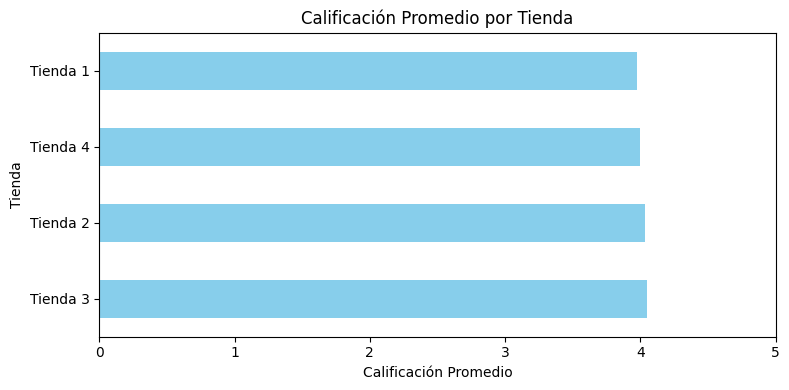

Calificación promedio por tienda:
Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: Calificación, dtype: float64


In [15]:
# Calificación promedio por tienda
calificacion_promedio = tiendas_combinadas.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)

# Gráfico de barras horizontal
plt.figure(figsize=(8, 4))
calificacion_promedio.plot(kind='barh', color='skyblue')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Calificación Promedio')
plt.ylabel('Tienda')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

print("Calificación promedio por tienda:")
print(calificacion_promedio)

# 4. Productos más y menos vendidos

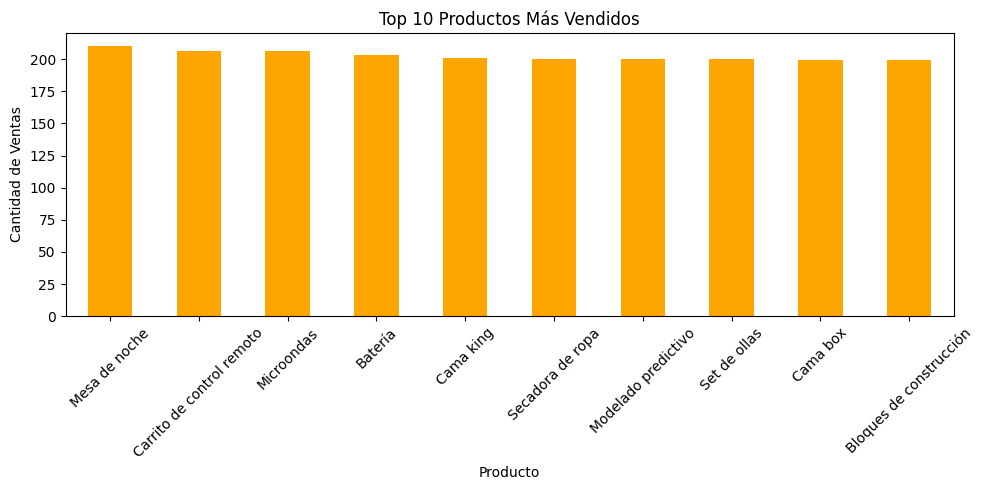

Top 10 productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64


In [16]:
# Top 10 productos más vendidos (por cantidad de ventas)
productos_mas_vendidos = tiendas_combinadas['Producto'].value_counts().head(10)

plt.figure(figsize=(10, 5))
productos_mas_vendidos.plot(kind='bar', color='orange')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 10 productos más vendidos:")
print(productos_mas_vendidos)

# 5. Envío promedio por tienda

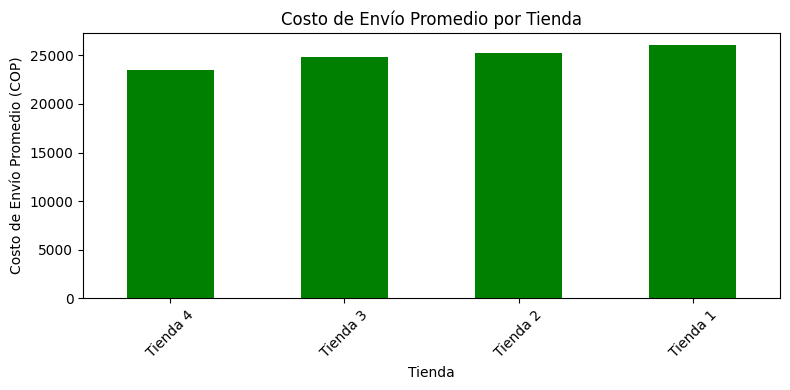

Costo de envío promedio por tienda:
Tienda
Tienda 4    23459.457167
Tienda 3    24805.680373
Tienda 2    25216.235693
Tienda 1    26018.609580
Name: Costo de envío, dtype: float64


In [30]:
# Costo de envío promedio por tienda
envio_promedio = tiendas_combinadas.groupby('Tienda')['Costo de envío'].mean().sort_values()

plt.figure(figsize=(8, 4))
envio_promedio.plot(kind='bar', color='green')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio (COP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Costo de envío promedio por tienda:")
print(envio_promedio)

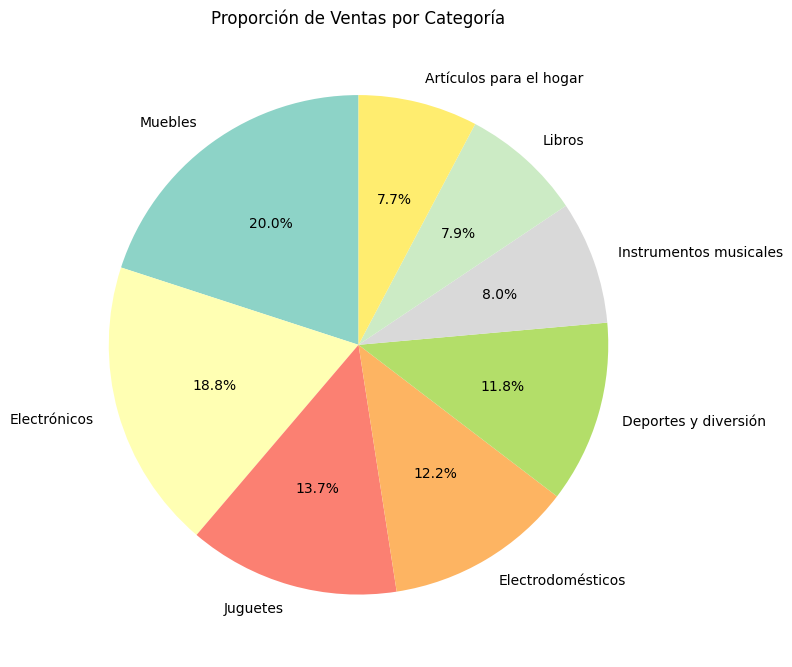

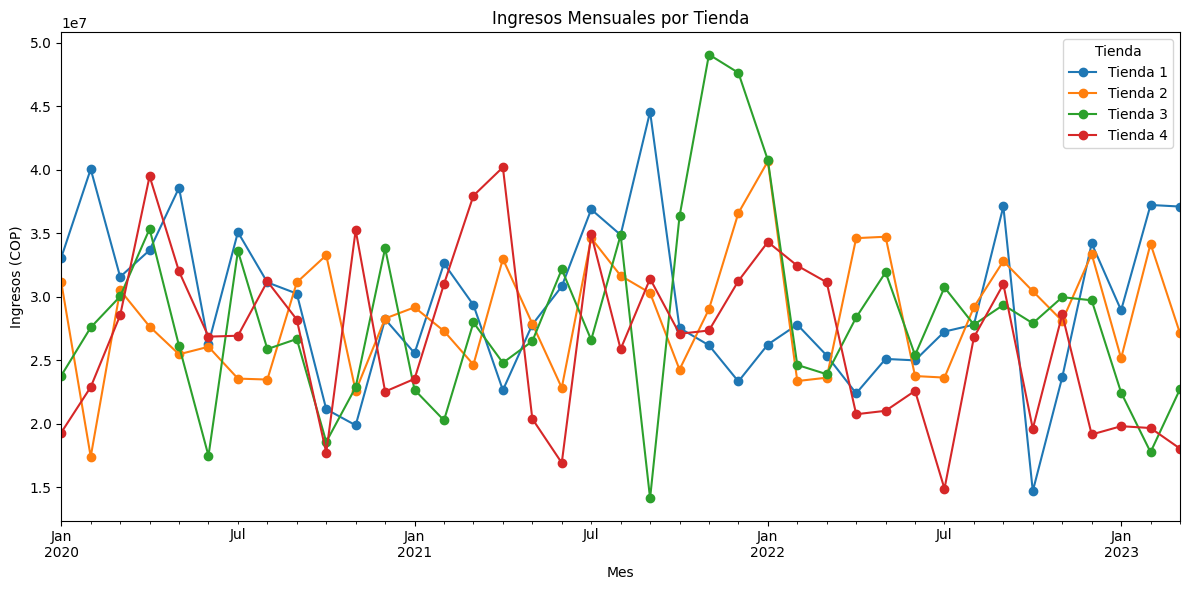

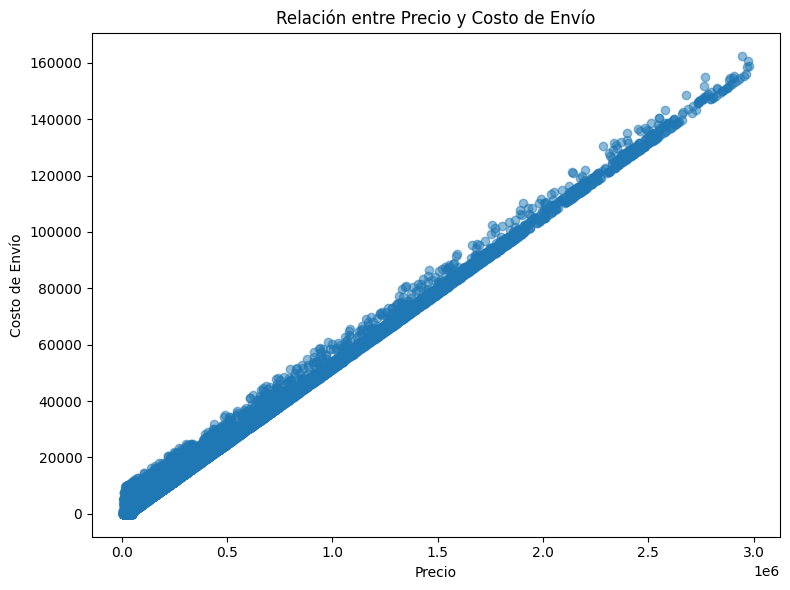

<Figure size 1000x600 with 0 Axes>

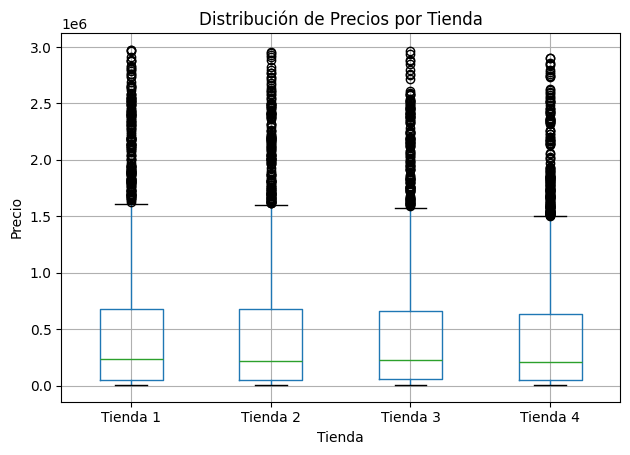

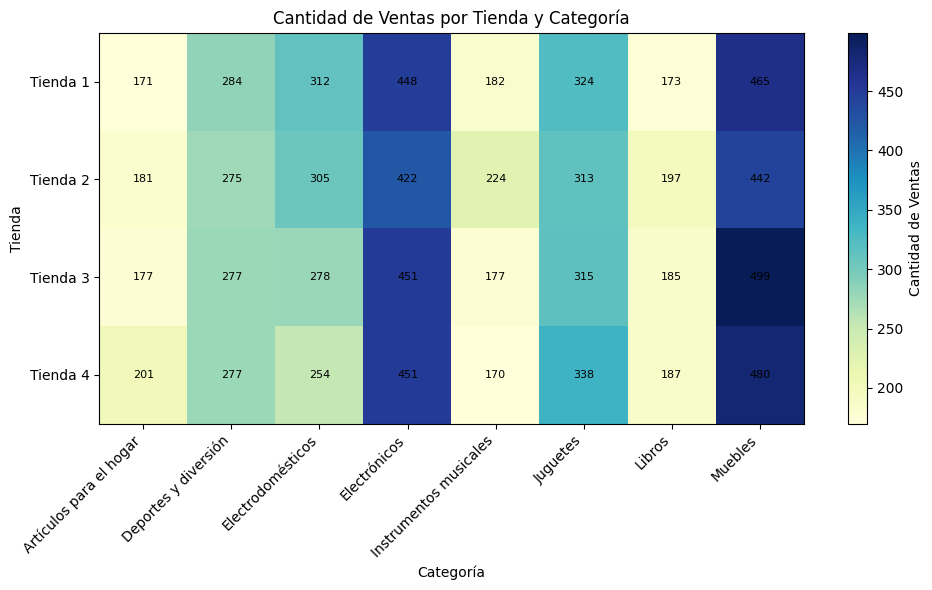

In [31]:
import numpy as np

# 1. Gráfico de pastel: proporción de ventas por categoría
ventas_por_categoria = tiendas_combinadas['Categoría del Producto'].value_counts()
plt.figure(figsize=(8, 8))
ventas_por_categoria.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Proporción de Ventas por Categoría')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 2. Gráfico de líneas: ingresos mensuales por tienda
tiendas_combinadas['Mes'] = tiendas_combinadas['Fecha de Compra'].dt.to_period('M')
ingresos_mensuales = tiendas_combinadas.groupby(['Mes', 'Tienda'])['Precio'].sum().unstack()
ingresos_mensuales.plot(figsize=(12,6), marker='o')
plt.title('Ingresos Mensuales por Tienda')
plt.xlabel('Mes')
plt.ylabel('Ingresos (COP)')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Gráfico de dispersión: relación entre precio y costo de envío
plt.figure(figsize=(8,6))
plt.scatter(tiendas_combinadas['Precio'], tiendas_combinadas['Costo de envío'], alpha=0.5)
plt.title('Relación entre Precio y Costo de Envío')
plt.xlabel('Precio')
plt.ylabel('Costo de Envío')
plt.tight_layout()
plt.show()

# 4. Boxplot: distribución de precios por tienda
plt.figure(figsize=(10,6))
tiendas_combinadas.boxplot(column='Precio', by='Tienda')
plt.title('Distribución de Precios por Tienda')
plt.suptitle('')
plt.xlabel('Tienda')
plt.ylabel('Precio')
plt.tight_layout()
plt.show()

# 5. Heatmap con Matplotlib y Numpy
ventas_heatmap = tiendas_combinadas.pivot_table(index='Tienda', columns='Categoría del Producto', values='Producto', aggfunc='count', fill_value=0)
plt.figure(figsize=(10,6))
plt.imshow(ventas_heatmap, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Cantidad de Ventas')
plt.xticks(ticks=np.arange(len(ventas_heatmap.columns)), labels=ventas_heatmap.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(ventas_heatmap.index)), labels=ventas_heatmap.index)
plt.title('Cantidad de Ventas por Tienda y Categoría')
plt.xlabel('Categoría')
plt.ylabel('Tienda')

# Mostrar los valores en cada celda
for i in range(len(ventas_heatmap.index)):
    for j in range(len(ventas_heatmap.columns)):
        plt.text(j, i, int(ventas_heatmap.iloc[i, j]), ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

Informe Final: Análisis de Desempeño de las Tiendas Alura Store
Introducción
El propósito de este análisis es asesorar al Sr. Juan en la decisión de cuál de sus tiendas Alura Store debería vender para iniciar un nuevo emprendimiento. Para ello, se analizaron los datos de ventas, categorías de productos, calificaciones de clientes, productos más y menos vendidos y costos de envío de las cuatro tiendas. El objetivo es identificar la tienda menos eficiente y presentar una recomendación basada en datos.
Desarrollo
1. Ingresos totales por tienda
Se calcularon los ingresos sumando el valor de las ventas de cada tienda. El gráfico de barras muestra que las tiendas tienen diferencias notables en sus ingresos totales.
Hallazgo: La tienda con menor ingreso total es una de las candidatas a ser vendida, ya que su aporte al negocio es menor comparado con las demás.
2. Categorías de productos más y menos vendidas
Se analizaron las ventas por categoría y por tienda. El gráfico de barras y el gráfico de pastel muestran que las categorías más fuertes en ventas son Electrónicos, Electrodomésticos y Muebles. Las categorías menos populares son Libros, Artículos para el hogar y Juguetes.
3. Calificaciones promedio de los clientes por tienda
El análisis de las calificaciones promedio revela que todas las tiendas mantienen una satisfacción del cliente similar, con promedios cercanos a 4 sobre 5. Esto indica que la percepción de los clientes es positiva en general y no hay una tienda que destaque negativamente en este aspecto.
4. Productos más y menos vendidos
El análisis de los productos más vendidos muestra que las ventas están diversificadas, sin dependencia de un solo producto. Los productos más vendidos incluyen muebles, electrodomésticos y juguetes. Los productos menos vendidos varían por tienda, pero suelen pertenecer a las categorías menos populares.
5. Costo de envío promedio por tienda
El gráfico de barras revela que la Tienda 1 tiene el costo de envío promedio más alto, mientras que la Tienda 4 es la más eficiente en este aspecto. Un costo de envío elevado puede afectar la rentabilidad y la satisfacción del cliente.
Conclusión y recomendación
Tras analizar los ingresos, la distribución de ventas por categoría, la satisfacción de los clientes, los productos más y menos vendidos y los costos de envío, se recomienda que el Sr. Juan venda la Tienda 1.
Justificación:
La Tienda 1 tiene el costo de envío promedio más alto, lo que reduce su rentabilidad.
No destaca significativamente en ingresos, calificaciones ni en productos más vendidos.
Las demás tiendas presentan mejor desempeño logístico o mayores ingresos, por lo que es más conveniente conservarlas.
Recomendación final:
> Se recomienda vender la Tienda 1 para optimizar la cadena y enfocar los recursos en las tiendas más eficientes y rentables.
Este informe está respaldado por los análisis y visualizaciones generados en el proyecto, lo que permite tomar una decisión informada y objetiva.